| 28 X 28 HandWritten Image | No Hidden Layer |
| :---: | :---: |
| 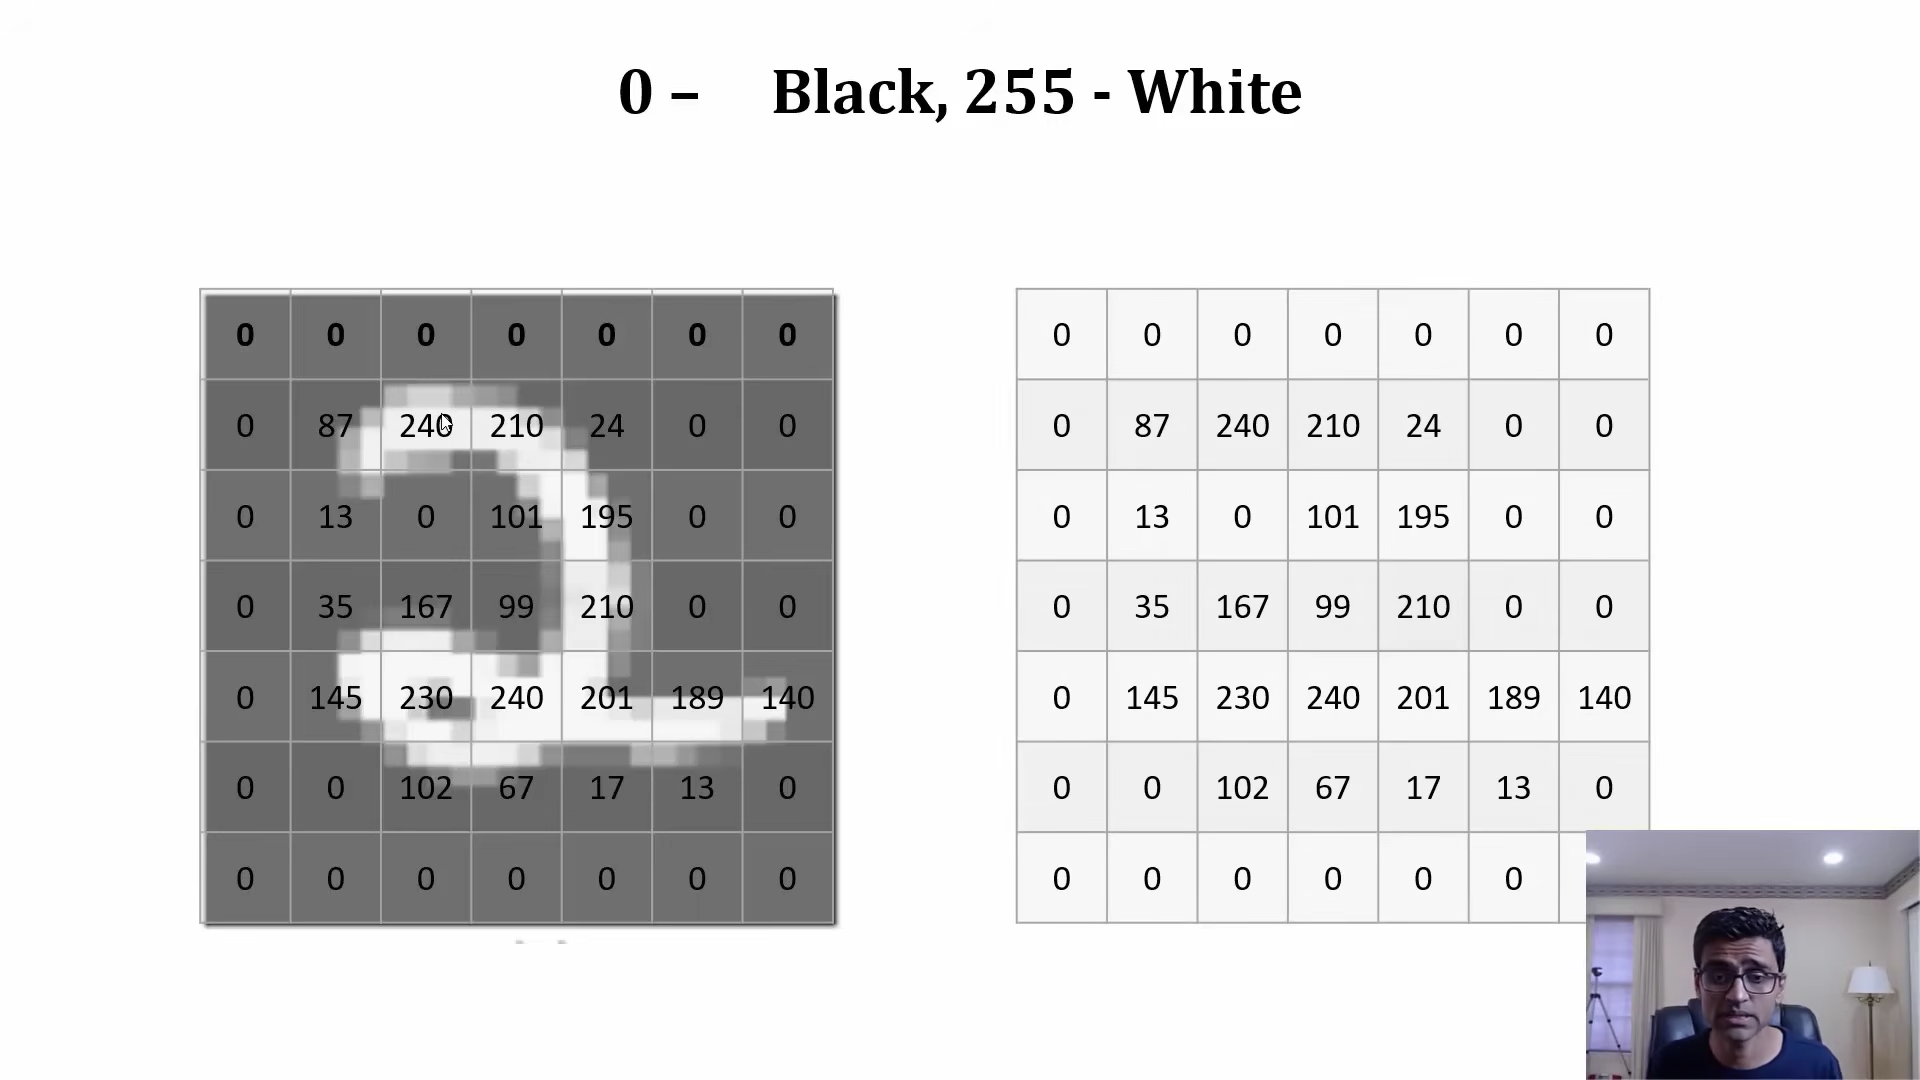 | 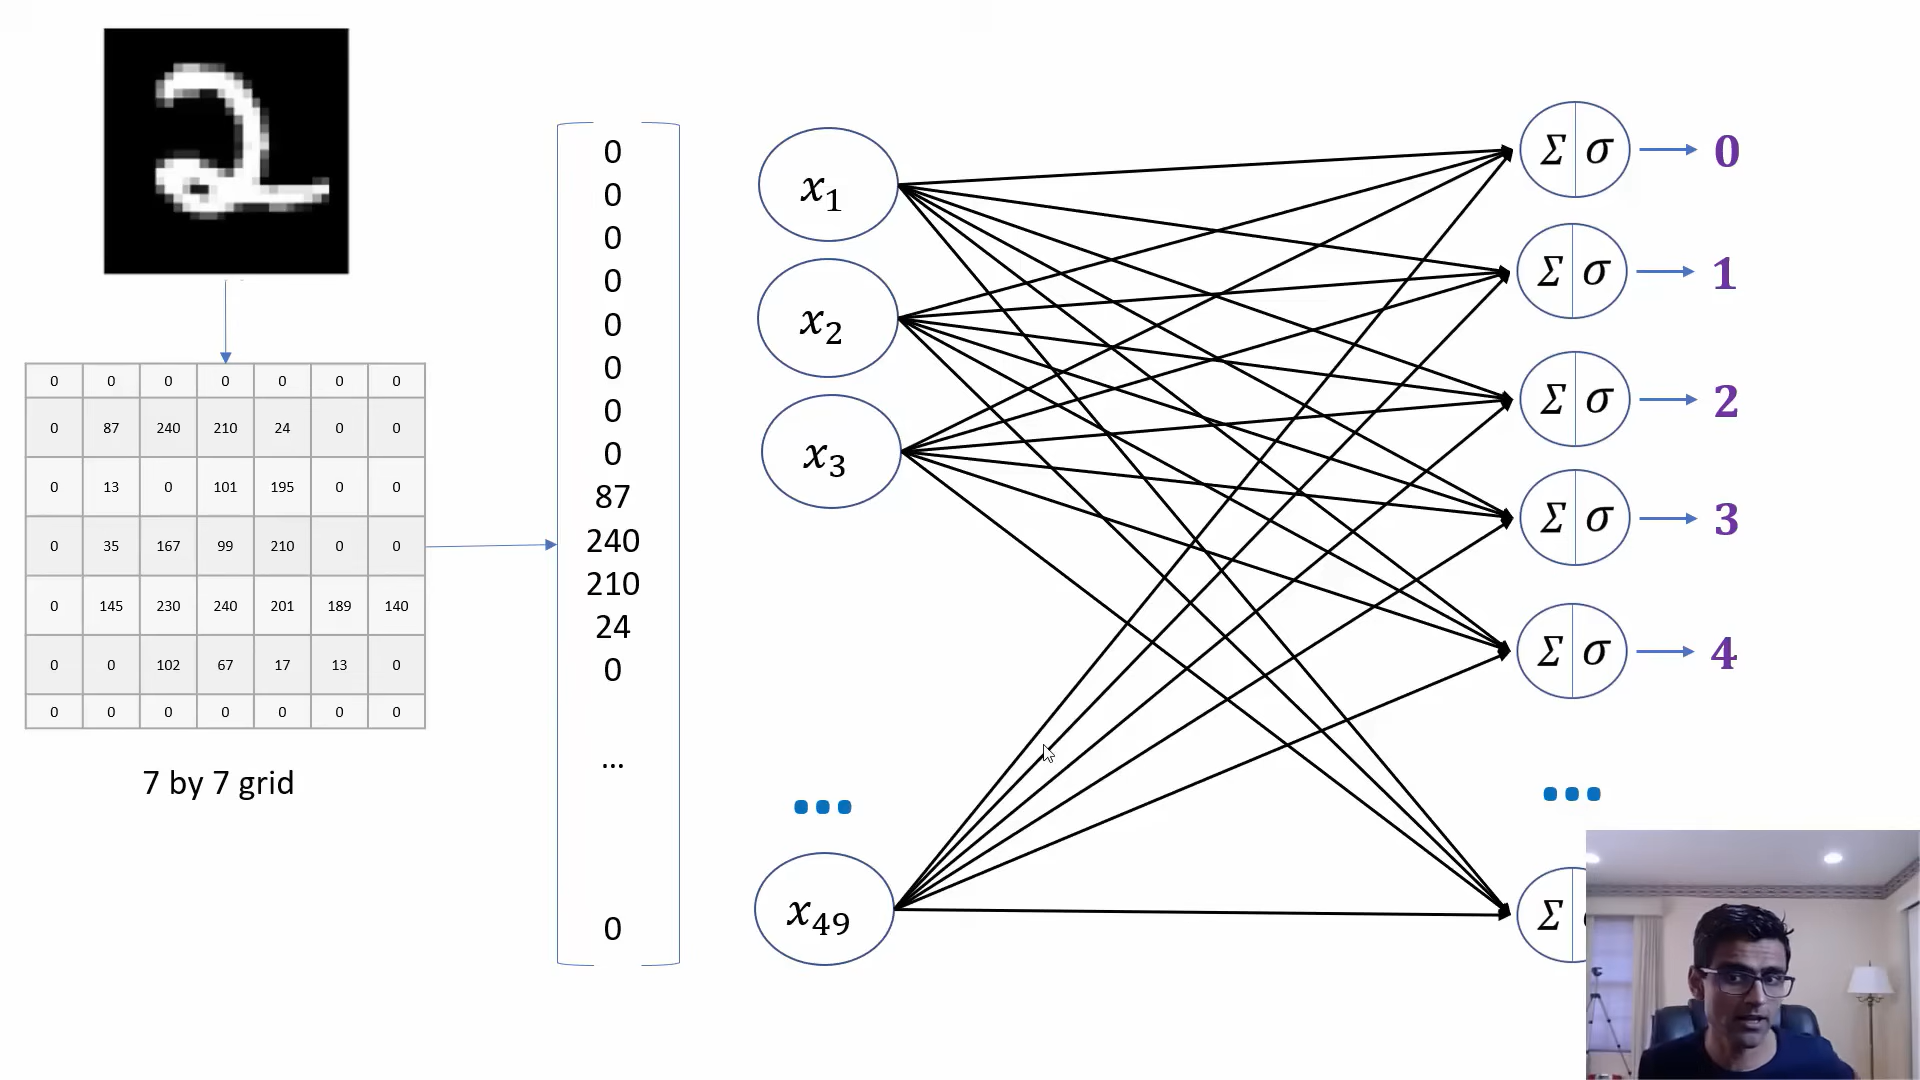 |

In [23]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

Training Data Images: 60000
Test Data Images: 10000
Image Shape: (28, 28)


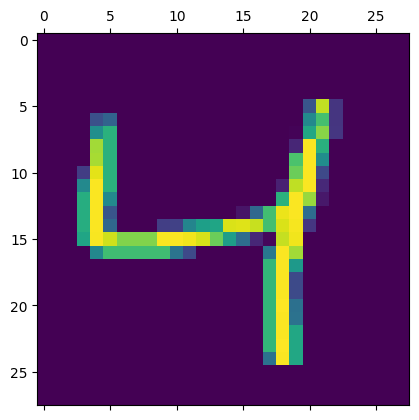

In [3]:
print("Training Data Images:", len(X_train))
print("Test Data Images:", len(X_test))
print("Image Shape:", X_train[0].shape)
plt.matshow(X_train[2])

In [4]:
# 1st Image at X_train
plt.show()

In [5]:
print("Image above is:", y_train[2])

Image above is: 4


In [6]:
#Flattening the 2D array 

print(" no of samples, length, width -", X_train.shape)
# Flattening the 2D images array to 1D array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(" no of samples, length -", X_train_flattened.shape)

 no of samples, length, width - (60000, 28, 28)
 no of samples, length - (60000, 784)


In [7]:
model = keras.Sequential([
    #Output layer - 10 | Input layer - 784
    keras.layers.Input(shape=(784,)),  # Use an Input layer as the first layer
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", #Another Eg: (MSE) Mean Square Error
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step - accuracy: 0.5127 - loss: 9.5473 
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.4902 - loss: 6.0639
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - accuracy: 0.4777 - loss: 5.7692
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - accuracy: 0.4645 - loss: 5.5826
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.4513 - loss: 5.3437


In [8]:
# We saw we had low accuracy (0.28)

# lets try scalling the values (making values b/w 0 & 1)
X_train_flattened = X_train_flattened / 225
X_test_flattened = X_test_flattened / 225

# now lets training the model
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.8332 - loss: 1.2016
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.8791 - loss: 0.8124
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 821us/step - accuracy: 0.8905 - loss: 0.5617
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 800us/step - accuracy: 0.9011 - loss: 0.4192
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - accuracy: 0.9102 - loss: 0.3422


In [9]:
# lets try to evaluate model on test dataset
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.9181 - loss: 0.3076


[0.3075917363166809, 0.9180999994277954]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


Text(95.72222222222221, 0.5, 'Truth')

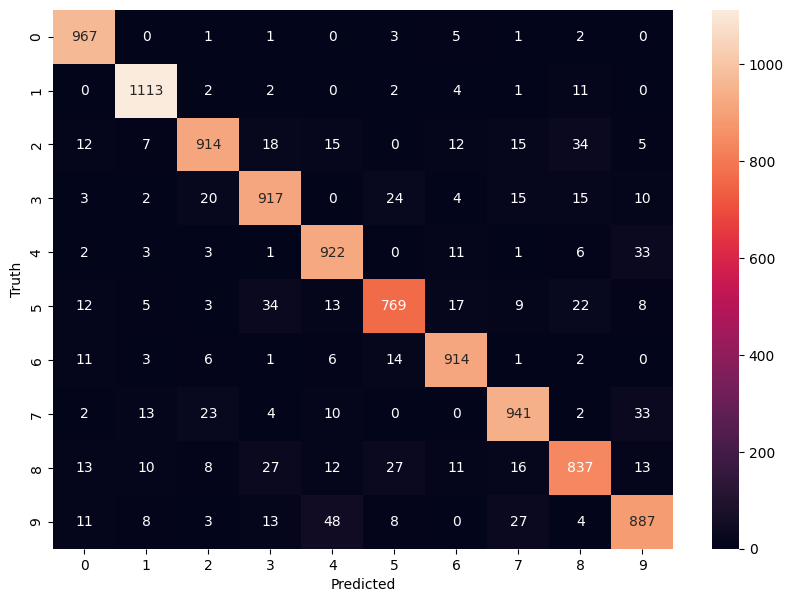

In [11]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted] # Calculating highest chances number for whole 
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [13]:
# Lets add a hidden layer (This helps in increasing accuracy)
model = keras.Sequential([
    #Output layer - 10 | Input layer - 784 (28 X 28)
    keras.layers.Input(shape=(784,)),  # Use an Input layer as the first layer
    keras.layers.Dense(100, activation="relu"), # Hidden Layer 100 neurons (100 < 784)
    keras.layers.Dense(10, activation="sigmoid") # Output Layer 10 neurons
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", #Another Eg: (MSE) Mean Square Error
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9235 - loss: 0.2646
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9651 - loss: 0.1188
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9749 - loss: 0.0821
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0637
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9845 - loss: 0.0501


In [14]:
# lets try to evaluate model on test dataset (HIDDEN LAYER)
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.9765 - loss: 0.0806


[0.0806160643696785, 0.9764999747276306]

In [22]:
# Using keras. so, we dont have to flatten it every time.
# Lets add a hidden layer (This helps in increasing accuracy)
model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Rescaling(1./255), # Scales pixel values to [0, 1]
    keras.layers.Flatten(), #flattening here (28 X 28) -> (784)
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", # This is like Log Loss Error #Another Eg of loss: (MSE) Mean Square Error
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5) # Didn't inputed already flatten X_train

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9215 - loss: 0.2717
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9634 - loss: 0.1243
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9734 - loss: 0.0882
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9800 - loss: 0.0659
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9840 - loss: 0.0534
